In [1]:
# CEPEJ
import pandas as pd
import numpy as np
cepej = pd.read_excel('cepej_example.xlsx', index_col=0)
cepej = cepej.dropna()
cepej.head()

,number_judges,number_no-judges,Information tools,Tools of communication,disposition time,clearance rate
pays,,,,,,
AT,273.294038,562.910905,3.5,13.00,138,101
BE,133.234188,435.132534,4.0,9.65,504,112
CH,143.291969,596.932803,4.5,7.50,110,100
DE,244.799383,651.320782,4.0,13.00,219,97
DK,64.588357,285.222184,1.0,10.17,206,95


In [2]:
y1 = 1000 - cepej['disposition time'].to_numpy()
y2 = cepej['clearance rate'].to_numpy()
Y = np.column_stack((y1, y2))
X = cepej[[
       "number_judges",
       "number_no-judges",
       "Information tools",
       "Tools of communication"
       ]].to_numpy()

In [3]:
# Parameters
outputs = None
g_input = np.ones((X.shape[1]))
g_output = np.ones((Y.shape[1]))
constraint = "DRS"

In [4]:
from Shapley import ShapleyModel
model = ShapleyModel(outputs = "multi-outputs", constraint = "DRS", g_inputs = np.ones((X.shape[1])), g_outputs =np.ones((Y.shape[1])))
DDF_results = model.dea_ddf(X,Y)
columns = ["DDF"]
df = pd.DataFrame(DDF_results, columns=columns)
df['Rank'] = df['DDF'].rank(ascending=True)
display(df)

,DDF,Rank
0,1.059028e-01,8.0
1,1.302850e-11,5.0
2,1.227791e-10,7.0
3,2.474448e+00,14.0
4,1.122606e-11,4.0
5,3.753739e+00,15.0
6,2.407980e-01,9.0
7,1.781102e+00,13.0
8,8.546978e-12,1.0
9,1.252857e+00,10.0


In [5]:
df = model.fit("shapley",X,Y)
columns = [
       "number_judges",
       "number_no-judges",
       "Information tools",
       "Tools of communication"
       ]
contrib_df = pd.DataFrame(df, index = cepej.index, columns = columns)
row_sums = contrib_df.sum(axis=1)
contrib_pourcentage = contrib_df.div(row_sums, axis=0) * 100
print("Absolute Contributions:", "\n")
display(contrib_df)
print("Contributions (%):", "\n")
display(contrib_pourcentage)

Absolute Contributions: 



,number_judges,number_no-judges,Information tools,Tools of communication
pays,,,,
AT,4.409449e-01,4.409449e-01,-1.216932e+00,4.409449e-01
BE,2.790734e-11,2.870596e-11,-2.545989e-11,-1.812491e-11
CH,8.936460e-11,4.555474e-11,-1.740156e-11,5.261364e-12
DE,2.653543e+00,2.653543e+00,-3.945802e+00,1.113164e+00
DK,-1.790780e+00,2.018929e+00,-1.790780e+00,1.562631e+00
ES,3.164726e+00,5.796762e+00,-4.216244e+00,-9.915052e-01
FI,1.849820e+00,7.504639e-01,-2.774980e+00,4.154935e-01
FR,1.333614e+00,2.821898e+00,-2.354738e+00,-1.967127e-02
GR,6.500000e+00,5.577444e+00,-6.824942e+00,-5.252502e+00


Contributions (%): 



,number_judges,number_no-judges,Information tools,Tools of communication
pays,,,,
AT,4.163676e+02,4.163676e+02,-1.149103e+03,4.163676e+02
BE,2.142023e+02,2.203321e+02,-1.954170e+02,-1.391175e+02
CH,7.278484e+01,3.710300e+01,-1.417306e+01,4.285226e+00
DE,1.072378e+02,1.072378e+02,-1.594619e+02,4.498634e+01
DK,-1.595126e+13,1.798348e+13,-1.595126e+13,1.391904e+13
ES,8.430863e+01,1.544264e+02,-1.123212e+02,-2.641380e+01
FI,7.682041e+02,3.116570e+02,-1.152410e+03,1.725486e+02
FR,7.487574e+01,1.584355e+02,-1.322068e+02,-1.104444e+00
GR,7.605060e+13,6.525661e+13,-7.985245e+13,-6.145476e+13


In [7]:
df_ES = model.fit("ES",X,Y)
contrib_df_ES = pd.DataFrame(df_ES, index = cepej.index, columns = columns)

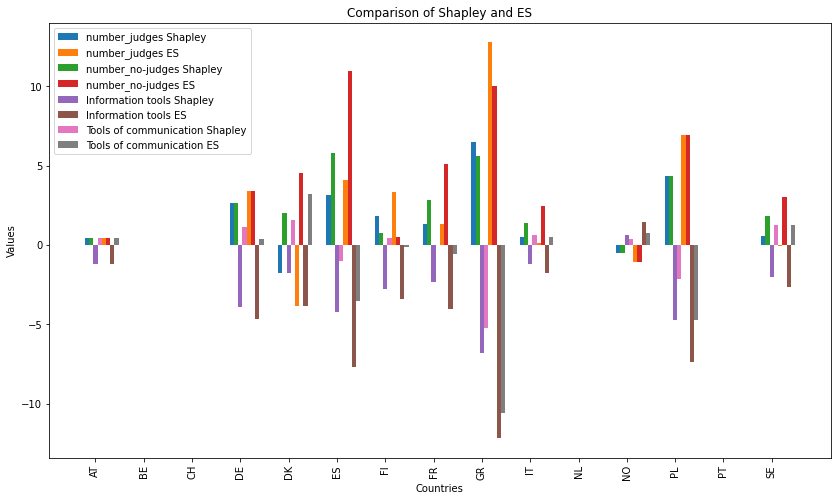

In [16]:
# Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.35  
countries = cepej.index
for i, input in enumerate(columns):
    bar1 = ax.bar(np.arange(len(countries)) - width/2 + i*(width/4), contrib_df[input], width/4, label=f'{input} Shapley')
    bar2 = ax.bar(np.arange(len(countries)) + width/2 + i*(width/4), contrib_df_ES[input], width/4, label=f'{input} ES')
ax.set_xlabel('Countries')
ax.set_ylabel('Values')
ax.set_title('Comparison of Shapley and ES')
ax.set_xticks(np.arange(len(countries)))
ax.set_xticklabels(countries, rotation=90)
ax.legend()
plt.show()